(Run the last cell first in order to enable custom formatting)
# Learning Pandas
## AMCDawes 
### Dec 2015
Some parts of our `CCDimage` code would be much improved by the use of pandas. In particular, some statistics and other anaylsis would be very straightforward. This is a place for my notes as I learn pandas.

In [38]:
# standard imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# use inline plots:
%matplotlib inline

# use ggplot style:
matplotlib.style.use('ggplot')

Our data is currently represented as a stack of 2D arrays (so a 3D "array"). In that implementation the third index is essentially a shot number and the first two are pixel row and pixel column. We'd like to make a dataframe of this data and then work with it in pandas instead of in an array. Another data type we have is the $K_p$ values (essentially the FFT output). In this case, it is a 1D array for each shot of data. The pandas version would be a dataframe with each element being a 1D array of $K_p$ values.

To test this, let's create a random dummy set that is 20 shots of 400 $K_p$ values:

In [10]:
# create an example dataframe:
df = pd.DataFrame(np.random.randn(20,400), index=np.arange(20), columns=1.23*np.arange(400))

In [11]:
df

,0.0,1.23,2.46,3.69,4.92,6.15,7.38,8.61,9.84,11.07,...,479.7,480.93,482.16,483.39,484.62,485.85,487.08,488.31,489.54,490.77
0,0.184962,-0.593215,0.189440,-0.041520,-0.468275,1.248782,-1.325620,0.712231,-0.162094,1.817380,...,-1.343064,-1.470482,0.735458,0.679417,-0.240810,-0.455247,-0.493477,0.546133,-0.093801,-0.870588
1,0.330364,1.285958,0.221395,-0.679064,-0.605855,-1.138653,0.432561,-0.072273,-0.031589,-0.955335,...,0.403545,-0.294596,-0.046364,1.550566,1.322492,0.158821,0.156565,-0.445687,-2.098845,-1.161122
2,-0.248033,-0.075215,1.170656,0.055841,-0.277661,0.005537,0.479036,0.754289,-0.441990,-1.282790,...,-0.323793,-3.010945,0.336506,-0.325221,0.376113,0.062601,-0.838108,-1.102468,0.338594,0.423082
3,1.721958,-0.023670,-1.054532,1.613846,0.368450,1.702158,-0.076590,-1.169031,0.483357,0.935780,...,-0.178595,1.032906,-2.016839,2.064577,1.685427,-0.653712,-1.918819,0.239802,0.550428,-1.531779
4,1.571422,-0.108286,0.329186,-0.399168,-0.406936,0.530031,-1.320046,-1.747431,-1.522011,1.004620,...,-1.139332,0.549895,1.571382,0.940728,-0.602542,0.138620,-0.593473,0.266806,-0.832163,-1.852263
5,-0.086009,0.595296,0.425701,1.522184,1.367878,1.281471,-0.541161,1.061773,-0.184506,-0.372571,...,0.419337,-0.072765,2.219141,-0.960565,-1.141693,0.024791,-1.159445,1.722109,-0.048243,1.181456
6,0.663104,1.017888,-0.049473,-0.651722,0.167377,0.377671,-0.467855,0.071341,0.123341,-0.587914,...,-1.230849,-1.044841,0.162082,-0.314299,-0.799146,-0.199157,0.314127,0.213541,1.427636,0.283838
7,-0.419924,-0.354931,0.916886,-0.751909,1.013355,-1.736379,0.522979,0.470240,-0.634015,-0.360114,...,1.375368,-0.968433,0.362897,-1.411900,0.530603,1.166181,0.625223,-0.266564,-0.570224,-0.822201
8,0.168113,0.887247,-1.040347,0.194861,0.442004,0.275889,-0.243377,1.089206,0.664697,0.223828,...,-0.928463,0.471350,0.490348,0.217929,-0.883274,-0.421726,1.486858,0.689218,0.754216,0.110106
9,1.186498,-0.960690,-0.348566,0.990295,0.675831,0.761218,-0.542745,0.261024,0.001028,1.173646,...,-0.059401,0.616330,-1.674507,-1.064985,0.535332,-1.322795,-1.539502,0.532675,0.173978,1.202523


So we see a few nice features:
 - we can label the columns with useful things, this could be the actual mode index $p$ for the columns
 - we can also label rows, this could be shot number, or even a alphanumeric code for shot/run (can it be alphanumeric?)
 
To show this, we'll create a list of the row labels using a [list comprehension](http://python-3-patterns-idioms-test.readthedocs.org/en/latest/Comprehensions.html). Note, this could also be done with a [generator](https://wiki.python.org/moin/Generators), but that is a more advanced pythonism

In [12]:
# nested string list comprehension:
rows = ["r{}s{}".format(i,j) for i in np.arange(4) for j in np.arange(5)]

In [13]:
# could also be a generator:
row_gen = ("r{}s{}".format(i,j) for i in np.arange(4) for j in np.arange(5))

In [14]:
for i in row_gen:
    print(i)

r0s0
r0s1
r0s2
r0s3
r0s4
r1s0
r1s1
r1s2
r1s3
r1s4
r2s0
r2s1
r2s2
r2s3
r2s4
r3s0
r3s1
r3s2
r3s3
r3s4


In [15]:
df2 = pd.DataFrame(np.random.randn(20,400), index=rows, columns=1.23*np.arange(400))

In [16]:
df2

,0.0,1.23,2.46,3.69,4.92,6.15,7.38,8.61,9.84,11.07,...,479.7,480.93,482.16,483.39,484.62,485.85,487.08,488.31,489.54,490.77
r0s0,-0.075841,-0.904605,-1.094072,0.605669,-1.935258,0.650063,0.660024,-2.170779,1.076856,-0.521928,...,1.028115,-0.131176,1.219894,0.364914,1.028008,-0.210408,0.584433,0.022389,0.198800,2.394047
r0s1,0.464307,0.507541,-0.215419,-0.744910,1.049569,-0.146941,0.288519,0.591788,-1.127253,-0.838182,...,0.611890,-0.847824,-0.776338,-0.056745,0.168138,-0.413380,-0.136623,1.508007,0.763493,-1.961929
r0s2,0.549017,-0.010613,0.350341,0.600244,0.564113,-0.135829,-0.530846,-0.960254,0.759039,-0.449446,...,0.624111,-0.088894,-1.126249,0.604857,-1.559714,1.838663,-1.085178,-1.633170,-0.223984,-0.287379
r0s3,0.854825,1.083141,-1.502872,0.215501,1.037609,0.905728,-0.099644,-0.872863,0.409028,-0.392250,...,-1.517258,0.598385,-0.585482,0.333990,-0.100666,-0.024075,-0.180373,-1.391312,2.034463,1.557063
r0s4,-0.540168,-2.024637,1.521336,0.458756,0.031326,-0.362836,0.002126,-0.623581,0.187056,-1.338258,...,0.124124,1.468026,0.705380,-1.086340,-1.358901,-0.294727,-0.324702,-0.815423,0.256468,1.090099
r1s0,0.826986,-0.842467,1.049514,1.150837,-0.785820,0.429018,1.115340,1.307672,0.376442,0.854339,...,-0.429645,-0.675573,-0.810689,0.187499,0.262096,0.496407,-0.978998,-0.594335,-0.133461,2.547492
r1s1,-2.407435,0.084073,0.926649,-1.474173,1.498178,0.161716,1.031246,-0.094132,-0.994738,-1.276429,...,0.244866,0.988604,-0.210704,-0.633346,-1.639042,2.043875,0.916145,1.058196,-0.923993,0.696969
r1s2,-0.553663,0.260108,0.565609,0.348731,-0.222907,1.454296,-0.804949,-1.058964,0.146190,1.406294,...,0.778546,-0.583378,-1.960605,-2.030100,0.323722,-1.504652,-0.222541,0.062490,0.261073,0.655042
r1s3,-1.923620,1.897037,1.345015,-1.532653,0.272023,0.384065,1.002208,0.272557,-0.646553,-0.312436,...,-0.196265,1.047866,0.542254,0.372460,0.896880,0.828275,-1.182366,-0.272894,-0.625088,0.087952
r1s4,-1.186381,0.669413,0.760152,-0.552006,0.521368,-0.949405,-0.020145,-0.090695,-1.702185,-0.757083,...,1.690140,0.634193,-1.026187,1.614171,-0.463188,0.336056,-1.407198,-1.658494,-2.787294,-0.790165


Now we can start to use these data structures in the CCDimage code. It is important to note, that the values can be complex too!

In [17]:
# complex example:
df3 = pd.DataFrame(np.random.randn(20,400) + 0.1*np.random.randn(20,400)*1j, index=rows, columns=1.23*np.arange(400))

In [18]:
df3

,0.0,1.23,2.46,3.69,4.92,6.15,7.38,8.61,9.84,11.07,...,479.7,480.93,482.16,483.39,484.62,485.85,487.08,488.31,489.54,490.77
r0s0,(-1.23576271913-0.185847883574j),(0.0529216538903+0.129158233718j),(0.724415189064-0.104322240946j),(-1.65301916201+0.0720106546298j),(-0.141481016733+0.0361646764067j),(-0.222757669741+0.0400796456564j),(-0.21361548993-0.0837229942064j),(0.943233544682-0.140260846666j),(0.567894567351+0.0306696240982j),(-0.902016328789+0.114131753957j),...,(-1.85902244304+0.0287101151056j),(0.921572078908-0.0710246678393j),(1.10489339086-0.0788672179216j),(-0.612657340247+0.0228959362189j),(-1.1688038002-0.156471551294j),(-0.512148594723-0.0535613010007j),(-0.756125963407-0.044222458599j),(-0.0407041390489+0.0460788111033j),(0.534728902924-0.0871808137524j),(0.132200155724+0.112614834113j)
r0s1,(-0.981939512432-0.0248213642288j),(0.201676834287+0.0332533538591j),(0.0949735642599-0.0258463075781j),(0.689998693135-0.0221663676157j),(0.830687375073-0.122014801224j),(-0.0578329368654+0.000577935992641j),(-0.422836392466-0.00451085096533j),(1.89934636394+0.145107214683j),(-1.30492029544-0.0293904757063j),(0.41542992756+0.0502382949271j),...,(-0.907980881357-0.00268087934794j),(-1.52999786965+0.100707843497j),(-0.209042624375-0.0286618206328j),(1.7737107014-0.0612318574594j),(1.56208020143-0.047036681766j),(-0.113889705226-0.0855435839874j),(2.01444713869+0.138536183898j),(-0.00361846728525+0.0192697989978j),(-2.2019193176+0.0904283692218j),(1.89656761249+0.0496429097914j)
r0s2,(1.82821071571-0.128909197042j),(0.282695903252+0.242320343889j),(0.872022068555-0.038784238982j),(-0.260669350793+0.0452001076767j),(-1.03357135086+0.0921465638993j),(0.993268356513-0.0285577214136j),(0.664639869899+0.0123485504631j),(-0.308572119062+0.0510162819116j),(-1.3338067307+0.0699766785877j),(0.43264868511+0.249764435176j),...,(1.35273043652+0.16129558619j),(0.682096489939+0.0635030727058j),(0.939696576024+0.0486226908048j),(0.116823836128-0.0815454113263j),(0.159117521664-0.0160049236552j),(0.880833567556-0.0983183596752j),(-1.34766497156-0.0644888627501j),(0.203560604553-0.0904372028935j),(-0.902965768874+0.101847259066j),(-1.68656584589-0.34389148341j)
r0s3,(-1.65411525983+0.0603759040104j),(0.730948292173+0.0543433215511j),(0.800166204462-0.157672412276j),(0.774865308574+0.077598975352j),(0.412742895736-0.00391215940931j),(-1.55615539458-0.0218819585597j),(1.13983471196-0.0848267311961j),(0.98468757961-0.0669251013132j),(1.18987141395-0.022651511229j),(-0.142564399548-0.00580960750606j),...,(-0.521348681699+0.0828146100835j),(0.858624116016-0.234377466052j),(1.31582349083-0.0740040124741j),(0.661047036604-0.105962870648j),(-0.296258381424-0.106262729265j),(0.585448302958+0.00873285003745j),(0.0773041569774-0.0801649117916j),(-0.298031886124-0.179873551867j),(-0.424452912506+0.00641296571024j),(1.14277935313-0.0433534432288j)
r0s4,(0.532960469669+0.060992160528j),(-0.466207894849-0.141470109493j),(-0.535656789752-0.0190094466983j),(-1.50120745986-0.0304633480535j),(-1.09560350726+0.142564263722j),(-0.827240055295-0.119204632388j),(0.470986902616-0.00493941945321j),(-0.559715502024-0.0607958298194j),(0.674368139181-0.0539698630908j),(1.81803386204-0.103103778697j),...,(-1.00228309014-0.020852228131j),(-0.73659892209-0.00914835489865j),(2.46517819721-0.0175754150102j),(0.35829962055-0.053494484444j),(-1.68000068509+0.0381826143409j),(-1.18632981202+0.0312460319758j),(-1.57648660658+0.116982019007j),(0.0592202718681+0.10224268974j),(-0.705469232509+0.188978635528j),(0.940453997001+0.200955905689j)
r1s0,(-0.0831914112863+0.163198685809j),(-0.932399221793-0.0270127921806j),(0.427573887868-0.00445047155494j),(-0.000164779002153-0.0770934811935j),(-0.60524235923+0.00705692043108j),(0.502600036119+0.0137702987694j),(0.409688265918-0.0165393442579j),(1.22242718331+0.0143142027866j),(1.94188539922-0.00801615876049j),(0.617609373478+0.0584193356061j),...,(0.490887761887+0.0561030719528j),(-1.42813701998+0.133173571147j),(0.57084612047+0.105991452

## slicing a dataframe:
We make frequent use of array slicing in python to access portions of our data array or to stack and analyze different parts of the data. Now we'll tinker on the dataframe to find out the equivalent methods.

First, the `[]` operation slices by rows (can use their names):

In [19]:
df3["r3s1":"r3s4"]

,0.0,1.23,2.46,3.69,4.92,6.15,7.38,8.61,9.84,11.07,...,479.7,480.93,482.16,483.39,484.62,485.85,487.08,488.31,489.54,490.77
r3s1,(-1.97452985187-0.00917296924165j),(-0.044038492442-0.0533890772792j),(0.0986571181164+0.0710607280918j),(-1.1207128996+0.0586751903985j),(-1.5802345318-0.0334258835107j),(0.12135481213-0.0837061277687j),(-0.822756383009+0.0918955806026j),(0.262795552307-0.163477735507j),(0.468747437275+0.107957622074j),(-1.28757025168+0.062082210564j),...,(0.324517453127-0.0994012120212j),(-0.726165686889-0.0214926813727j),(0.670027504726-0.067414825192j),(0.672493610096+0.0259248657871j),(1.15051072605-0.0835546880332j),(-1.38438661204+0.0219637888629j),(-0.00436738953142+0.0626452726052j),(-0.250798820508+0.0744165104815j),(1.2172410505-0.0602919040257j),(1.20402719323+0.0942937778706j)
r3s2,(-0.733355394908+0.056188510842j),(-0.296812258943-0.026928650419j),(2.09901585316+0.0526436018032j),(0.182775108299+0.115145887806j),(-1.1379775679-0.0759761080345j),(-1.14674798938-0.0278691624333j),(0.239838433415+0.0632058032046j),(-0.677137889436-0.0456090271711j),(0.489696281226-0.0696107586012j),(-0.205295893752+0.0645651443053j),...,(0.927739415542+0.0779916955444j),(0.214939857223+0.116549139614j),(-0.379743555744+0.0572046696832j),(-0.373751223244-0.212776530072j),(0.308789167635-0.182568076047j),(0.948144120608-0.124195507151j),(-1.15062672337-0.0303554524768j),(1.71342836304-0.0034973810374j),(0.425120909614-0.0466252376535j),(0.815838070076+0.00567032218644j)
r3s3,(-0.204728653523-0.0770652212807j),(-0.239887247958-0.0825695492337j),(-0.214408098315-0.0638810016771j),(0.792915996552-0.190837703973j),(1.12443529821+0.0606369062219j),(-0.232448865638-0.0762480375094j),(0.260266836464+0.13866206314j),(1.54180710593-0.0523163676016j),(0.970536907823-0.144805603398j),(-0.237802580149-0.00572604234727j),...,(0.402640963686-0.02172174908j),(1.25094400433+0.013017533622j),(-1.50153426709-0.145616537321j),(0.418055057174+0.103958323504j),(-0.296678124153-0.109653945176j),(1.4713497838-0.0613489063866j),(-0.537638774566+0.130145597662j),(-0.475989304026-0.114262040163j),(0.726076244451-0.0957531986279j),(-0.132013018173-0.0619341538463j)
r3s4,(1.05103685387-0.189742584952j),(-0.0509470053352+0.142728853561j),(-1.79861171511+0.16745376313j),(-0.945647204637+0.1164464946j),(-0.760497351997+0.0301875360999j),(1.22773767134+0.06532550402j),(0.881494668841-0.0154188411389j),(0.223888650066+0.104219802766j),(-1.83339245782-0.231777846886j),(0.426401310564+0.0241752261768j),...,(-1.31086262875+0.0397126601754j),(0.468717155464+0.0327314502877j),(-0.748550410265-0.0308808654089j),(-1.49144037642+0.00352974857982j),(-3.18461600504-0.0270045225108j),(0.312807130525+0.191219919879j),(-1.97125711411-0.0765881341189j),(-1.49054702473-0.202426634312j),(-0.827802382667-0.00395477668367j),(0.955755828135-0.0491122893626j)


## Select a few columns:

In [76]:
df4 = df3[df3.columns[4:10]]

## Plotting
It's easy to plot using the built-in method `.plot()` from pandas. There are also ways to access the data and plot using `matplotlib`

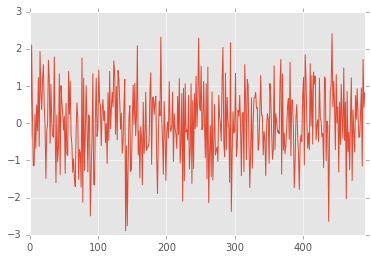

In [75]:
onerow = df3.loc["r3s2"].apply(np.real) # take the real part to avoid issues plotting
onerow.plot()

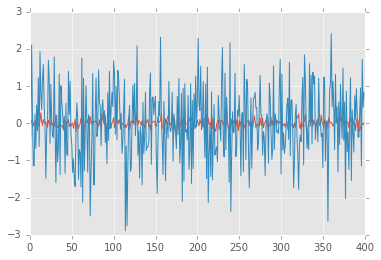

In [77]:
# can also use the regular old plot calls from matplotlib
plt.plot(np.imag(df3.loc["r3s2"]))
plt.plot(np.real(df3.loc["r3s2"]))

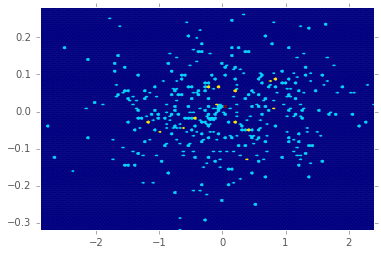

In [41]:
plt.hexbin(np.real(df3.loc["r3s2"]),np.imag(df3.loc["r3s2"]))

## More stats:
We can do a number of cool things with the data frame. For example, plotting different modes against each other using the `scatter_matrix` function.

In [58]:
from pandas.tools.plotting import scatter_matrix

## Apply
How to change values in the columns:

In [69]:
# take the real part or abs of the columns (save as a different dataframes)
df4real = df4.apply(np.real)
df4abs = df4.apply(np.abs)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1161151d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1161af6a0>]], dtype=object)

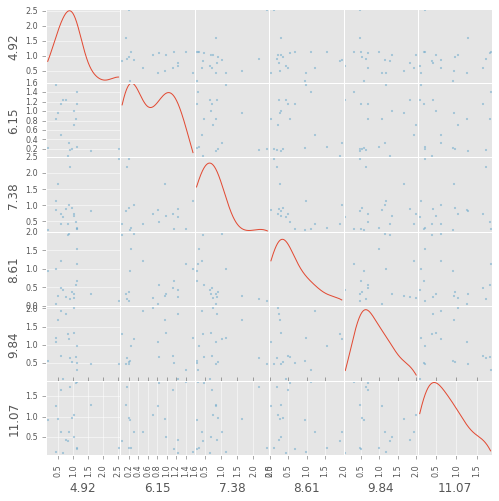

In [72]:
# the diagonal will be the kernel density estimate (kde)
scatter_matrix(df4abs, figsize=(8, 8), diagonal='kde')

In [1]:
# Format the notebook using style by Lorena Barba (http://lorenabarba.com/)
# run this cell first to use the nice format.
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()